<a href="https://colab.research.google.com/github/Matheusisa/AluraStore_Desafio/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Nesta primeira análise, vou calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.
Tambem vou representar essa analise visualmente num grafico de barras.

In [ ]:
#Nesta primeira análise,devemos calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.

faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:,.2f}")

faturamentos = {
    "Loja 1": faturamento_loja1,
    "Loja 2": faturamento_loja2,
    "Loja 3": faturamento_loja3,
    "Loja 4": faturamento_loja4
}

loja_maior_faturamento = max(faturamentos, key=faturamentos.get)

print(f"A loja com o maior faturamento é: {loja_maior_faturamento}")

Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58
A loja com o maior faturamento é: Loja 1


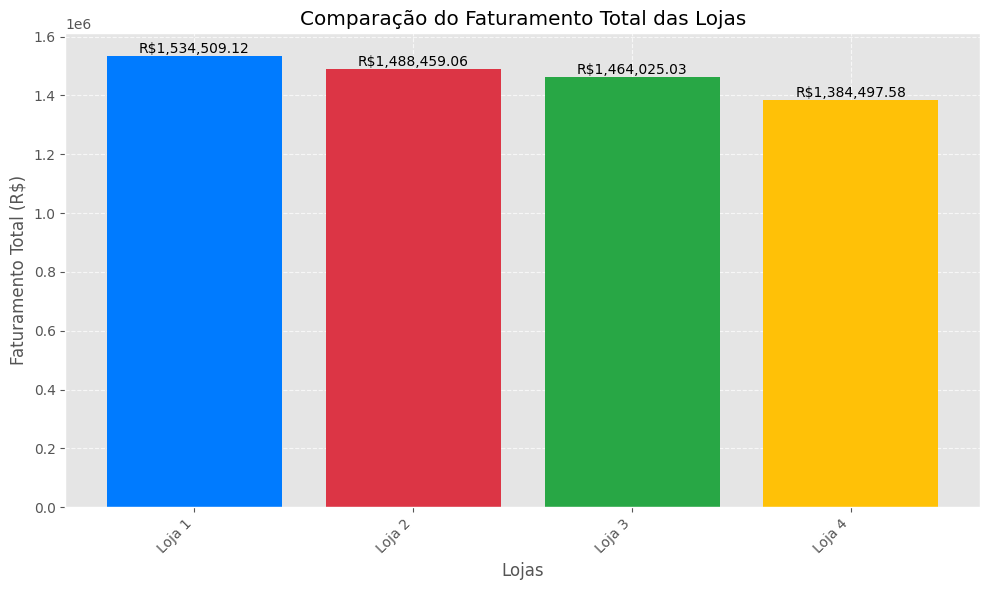

<Figure size 640x480 with 0 Axes>

In [ ]:
# Comparação grafica de desempenho de cada loja

import pandas as pd
import matplotlib.pyplot as plt

faturamentos = {
    "Loja 1": faturamento_loja1,
    "Loja 2": faturamento_loja2,
    "Loja 3": faturamento_loja3,
    "Loja 4": faturamento_loja4
}

lojas = list(faturamentos.keys())
valores = list(faturamentos.values())

plt.style.use('ggplot')  # Aplicando um tema

plt.figure(figsize=(10, 6))
barras = plt.bar(lojas, valores, color=['#007bff', '#dc3545', '#28a745', '#ffc107'])
plt.xlabel("Lojas")
plt.ylabel("Faturamento Total (R$)")
plt.title("Comparação do Faturamento Total das Lojas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)  # Adicionando grade

# Adicionando valores nas barras
for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 5,
             f'R${valor:,.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Salvando em alta resolução
plt.savefig('grafico_faturamento.png', dpi=300)


# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
